Lucas Ramadan - Final Presentation
=======

### Classification of Rock & Hip-Hop Music

In [1]:
from IPython.display import Image
import Scraping_Script

### Why? -- Two of my favorite albums

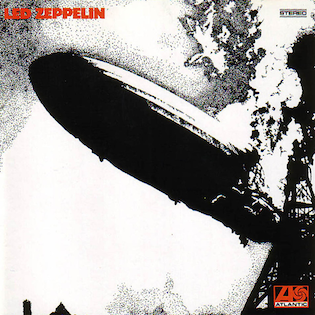

In [2]:
Image(filename='imgs/led.png')

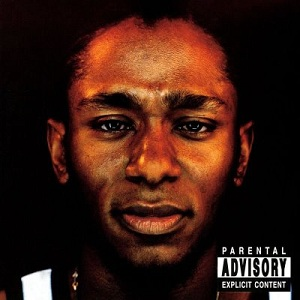

In [3]:
Image(filename='imgs/mos.jpg')

# First things first: Where's the data?

### We need to scrape a ton of lyrics ... Luckily There's Already an API 

http://genius.com/Yasiin-bey-mathematics-lyrics

http://genius-api.com/

### How I got the data

In [ ]:
%psource Scraping_Script

##### Note: Originally tried to get all songs straight into CSV file, wasted some time. Should have just written straight into .txt or .json from the getgo!

In [ ]:
# take a look at the files!
%cd data/
! ls
%cd ../

# Let's first get the data into a DF for easier viewing:

In [178]:
# need some help from system modules
import os
import io

data = {'artist': [], 'song': [], 'lyrics': []}

for (dirpath, dirnames, filenames) in os.walk('data/'):
    print 'ignore:', filenames[0]
    for fn in filenames[1:]:
        with io.open('data/'+fn, 'r', encoding='utf-8') as f:
            data['lyrics'].append(f.read())
            data['artist'].append(fn.split(' - ')[0])
            data['song'].append(fn.split(' - ')[1].replace('.txt', ''))

ignore: .DS_Store


In [179]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

artist                                             lyrics  \
0  2 Chainz  100, 100, 100, 100 (x8)\nYou know I keep it (x...   
1  2 Chainz  I am so faded, might put fifty on the ladies\n...   
2  2 Chainz  My rhyme style real nonchalant\n Trust me rude...   
3  2 Chainz                                  SONG COMING SOON    
4  2 Chainz  Karate kid bitch, I got a lot of kick\n Smokin...   

                                    song  
0                     100 by Bangladesh   
1          100k by Nelly  prod. by Detai  
2  2 Chainz Sway in the Morning Freestyl  
3    2 Heavy by RiFF RAFF  prod. by Dipl  
4         2 Of Everything by Boy Wonder

In [180]:
print "How many song's we're working with:", df.shape[0]

How many song's we're working with: 514


In [181]:
# make a new feature
df['song_length'] = [len(song) for song in df['lyrics']]

In [182]:
df.head()

artist                                             lyrics  \
0  2 Chainz  100, 100, 100, 100 (x8)\nYou know I keep it (x...   
1  2 Chainz  I am so faded, might put fifty on the ladies\n...   
2  2 Chainz  My rhyme style real nonchalant\n Trust me rude...   
3  2 Chainz                                  SONG COMING SOON    
4  2 Chainz  Karate kid bitch, I got a lot of kick\n Smokin...   

                                    song  song_length  
0                     100 by Bangladesh          2527  
1          100k by Nelly  prod. by Detai         1857  
2  2 Chainz Sway in the Morning Freestyl         1082  
3    2 Heavy by RiFF RAFF  prod. by Dipl           17  
4         2 Of Everything by Boy Wonder          2083

In [183]:
# are there any songs that are empty?
df[df['song_length'] < 100]

artist             lyrics  \
3         2 Chainz  SONG COMING SOON    
147  Guns N' Roses                      
211   Led Zeppelin                      
214   Led Zeppelin                      
248        Mos Def                      
291        Nirvana                      
311     Pink Floyd                      
312     Pink Floyd              \n\n    
313     Pink Floyd                      
320     Pink Floyd                      
324     Pink Floyd                      
446    The Beatles                      
448    The Beatles                      

                                                  song  song_length  
3                  2 Heavy by RiFF RAFF  prod. by Dipl           17  
147                                         Going Down            0  
211             Black Mountain Side prod. by Jimmy Pag            0  
214                     Bron-Yr-Aur prod. by Jimmy Pag            0  
248                       Black on Both Sides [Credits            0  
291                                             Beeswa            0  
311                                       Allons-y (1)            0  
312                                       Allons-y (2)            3  
313                                            Anisina            0  
320                                Any Colour You Like            0  
324                                         Autumn '68            0  
446                               All Things Must Pass            0  
448  And I Love Her by Kurt Cobain  prod. by Kurt C...            0

In [184]:
# lets just keep the songs that have content
df = df[df['song_length'] > 20]

In [185]:
print "How many song's we're working with:", df.shape[0]

How many song's we're working with: 501


In [186]:
# breakdown of the number of songs by artist
for artist in set(df['artist']):
    print artist, '-', len(df[df['artist'] == artist])

Nirvana - 24
Talib Kweli - 27
ACDC - 25
Snoop Dogg - 27
Rolling Stones - 27
Mos Def - 25
Led Zeppelin - 21
Guns N' Roses - 24
2 Chainz - 24
The Beatles - 23
Eminem - 27
Nas - 27
Aerosmith - 24
Kanye West - 27
Young Jeezy - 27
Common - 27
The Who - 24
Queen - 24
Pink Floyd - 20
Kendrick Lamar - 27


# Now we need some labels, let's generate them based off of the artist name!

In [187]:
# first lets get our rap artist and rock artists
rappers = ['Talib Kweli', 'Snoop Dogg', 'Mos Def', '2 Chainz', 'Eminem',
           'Nas', 'Kanye West', 'Young Jeezy', 'Common', 'Kendrick Lamar']

rockers = ['Nirvana', 'ACDC', 'Rolling Stones', 'Led Zeppelin', "Guns N' Roses", 
           'The Beatles', 'Aerosmith', 'The Who', 'Queen', 'Pink Floyd']

In [188]:
df['genre'] = [u'rap' if a in rappers else u'rock' for a in df['artist']]

In [189]:
df.head()

artist                                             lyrics  \
0  2 Chainz  100, 100, 100, 100 (x8)\nYou know I keep it (x...   
1  2 Chainz  I am so faded, might put fifty on the ladies\n...   
2  2 Chainz  My rhyme style real nonchalant\n Trust me rude...   
4  2 Chainz  Karate kid bitch, I got a lot of kick\n Smokin...   
5  2 Chainz  Girl, don’t hide that pussy\nYou should be the...   

                                      song  song_length genre  
0                       100 by Bangladesh          2527   rap  
1            100k by Nelly  prod. by Detai         1857   rap  
2    2 Chainz Sway in the Morning Freestyl         1082   rap  
4           2 Of Everything by Boy Wonder          2083   rap  
5  24 Hours by TeeFlii  prod. by DJ Mustar         1373   rap

# So what does a song look like? How much cleaning will it require?

In [16]:
# I appologize ahead of time for explicives aplenty!
df['lyrics'][0]

u"100, 100, 100, 100 (x8)\nYou know I keep it (x4)\n\n\n My life is but a dream pullin' cars up\n Told you motherfuckers keys open doors up\n Never excited when I'm seen with something gorgeous\nPut highway miles on these bitches like a tour bus\n Daddy Warbucks, without a born trust\n Diamonds all on this black gold like an oil rush\n The highest quality, the chains are all flush\n Known Jacob since the nineties so he spoils us\n Stock spoilers, no kits on 'em\n Why Panamera, nine-eleve shits on 'em\n Chuck the deuce as I Tokyo drift on 'em\n The top drops like this Bangladesh heat on 'em\n\n\n100, 100, 100, 100, you never keep it (x4)\n\n\n Yo, get yourself a hundred years tryin' to be the boss\n Stand next to the chandeliers, you could see the shards\n Ain't no diamonds in the watch, but you see the cross\n When you spoon feed them that dope they need it more\n All night, sweet sales\n Four pipes, V twelves\n Yeah, you know what them grams do\n Bad bitch with me that the industry ai

# Things we SHOULD do:

- Get rid of newline characters ('\n')<br><br>
- Get rid of repeat symbols ('(x#)')

In [17]:
# get rid of the newline characters
song = df['lyrics'][0].replace('\n', ' ')

In [18]:
# lets get some use out of RegularExpressions
import re

In [19]:
# example of getting rid of weird (x8) repeat symbols
song = re.sub('\(x\d\)', ' ', song)

In [20]:
# getting rid of some weird spacing
song = re.sub('(  ){2,3}', ' ', song)

In [21]:
song

u"100, 100, 100, 100   You know I keep it My life is but a dream pullin' cars up  Told you motherfuckers keys open doors up  Never excited when I'm seen with something gorgeous Put highway miles on these bitches like a tour bus  Daddy Warbucks, without a born trust  Diamonds all on this black gold like an oil rush  The highest quality, the chains are all flush  Known Jacob since the nineties so he spoils us  Stock spoilers, no kits on 'em  Why Panamera, nine-eleve shits on 'em  Chuck the deuce as I Tokyo drift on 'em  The top drops like this Bangladesh heat on 'em   100, 100, 100, 100, you never keep it Yo, get yourself a hundred years tryin' to be the boss  Stand next to the chandeliers, you could see the shards  Ain't no diamonds in the watch, but you see the cross  When you spoon feed them that dope they need it more  All night, sweet sales  Four pipes, V twelves  Yeah, you know what them grams do  Bad bitch with me that the industry ain't ran through  Na, I ain't stop hustling yet,

# Things we COULD do:

- lowercase all words<br><br>
    - is this a good idea? It will remove entities (ex. "Will Smith" becomes "will smith")<br><br>
- fix colloquialisms (ex. "pullin'" to "pulling")<br><br>
    - is this a good idea? colloquialisms seem like a good indicator of a rap song (ex. 'em is a strong feature)<br><br>
- separate hyphenated terms (ex. 'fifty-fifty') <br><br>
- get rid of, or convert numbers to words (ex. '100' --> 'one hundred')<br><br>
    - is this a good idea? seems like rap songs talk about money quite often, maybe numbers are predictive?<br><br>
- **Stemming**, **Lemmatization**

# From looking ahead, I know that some of the most important words for classification appear in both their plural and non-plural forms

### So lets Stem all of the terms in our songs, to allow for better comparisons and more informative features

First, lets run through all the songs and apply some of the rules that we realized we needed. 

In [22]:
df['lyrics'][0]

u"100, 100, 100, 100 (x8)\nYou know I keep it (x4)\n\n\n My life is but a dream pullin' cars up\n Told you motherfuckers keys open doors up\n Never excited when I'm seen with something gorgeous\nPut highway miles on these bitches like a tour bus\n Daddy Warbucks, without a born trust\n Diamonds all on this black gold like an oil rush\n The highest quality, the chains are all flush\n Known Jacob since the nineties so he spoils us\n Stock spoilers, no kits on 'em\n Why Panamera, nine-eleve shits on 'em\n Chuck the deuce as I Tokyo drift on 'em\n The top drops like this Bangladesh heat on 'em\n\n\n100, 100, 100, 100, you never keep it (x4)\n\n\n Yo, get yourself a hundred years tryin' to be the boss\n Stand next to the chandeliers, you could see the shards\n Ain't no diamonds in the watch, but you see the cross\n When you spoon feed them that dope they need it more\n All night, sweet sales\n Four pipes, V twelves\n Yeah, you know what them grams do\n Bad bitch with me that the industry ai

In [190]:
def partial_clean_songs(l):
    
    l = list(l)
    
    for i, song in enumerate(l):
        # first, lowercase the song
        song = song.lower()
        
        # second, remove newline characters
        song = song.replace('\n', ' ')
        
        # third, remove repeat characters
        song = re.sub('\(x\d\)', ' ', song)
        
        # fourth, remove hyphens
        song = song.replace('-', ' ')
        
        # fifth, remove commas
        song = song.replace(',', ' ')
        
        # sixth, cut down excessive spaces
        song = re.sub('( ){2,4}', ' ', song)
        
        # finally, override the song
        l[i] = song
    
    return l

In [191]:
from nltk.stem import PorterStemmer

def full_clean_songs(l):
    """
    INPUT: list of songs
    OUTPUT: list of cleaned songs
    """
    
    l = list(l)
    ps = PorterStemmer()
    
    for i, song in enumerate(l):
        # first, lowercase the song
        song = song.lower()
        
        # second, remove newline characters
        song = song.replace('\n', ' ')
        
        # third, remove repeat characters
        song = re.sub('\(x\d\)', ' ', song)
        
        # fourth, remove hyphens
        song = song.replace('-', ' ')
        
        # fifth, remove commas
        song = song.replace(',', ' ')
        
        # sixth, cut down excessive spaces
        song = re.sub('( ){2,4}', ' ', song)
        
        # now we need to go into the words of the song, stem them, and then rejoin them!
        stemmed_song = u""
        
        for w, word in enumerate(song.split()):
            try:
                stemmed_song += ps.stem_word(word) + " "
            # if we can't stem the word, just skip stemming it
            except:
                stemmed_song += word + " "

        # now override the song
        l[i] = stemmed_song
    
    return l

In [192]:
# just replace our lyrics with cleaned lyrics
df['lyrics'] = partial_clean_songs(df['lyrics'])

In [193]:
# lets save the stemmed lyrics as its own column
# so we can compare the quality of models with each!
df['stemmed_lyrics'] = full_clean_songs(df['lyrics'])

In [27]:
# taking a look at our example that we know
df['lyrics'][0]

u"100 100 100 100 you know i keep it  my life is but a dream pullin' cars up told you motherfuckers keys open doors up never excited when i'm seen with something gorgeous put highway miles on these bitches like a tour bus daddy warbucks without a born trust diamonds all on this black gold like an oil rush the highest quality the chains are all flush known jacob since the nineties so he spoils us stock spoilers no kits on 'em why panamera nine eleve shits on 'em chuck the deuce as i tokyo drift on 'em the top drops like this bangladesh heat on 'em 100 100 100 100 you never keep it  yo get yourself a hundred years tryin' to be the boss stand next to the chandeliers you could see the shards ain't no diamonds in the watch but you see the cross when you spoon feed them that dope they need it more all night sweet sales four pipes v twelves yeah you know what them grams do bad bitch with me that the industry ain't ran through na i ain't stop hustling yet but i plan to own a bunch of vehicles 

In [29]:
# stemmed version of the song!
df['stemmed_lyrics'][0]

u"100 100 100 100 you know i keep it my life is but a dream pullin' car up told you motherfuck key open door up never excit when i'm seen with someth gorgeou put highway mile on these bitch like a tour bu daddi warbuck without a born trust diamond all on thi black gold like an oil rush the highest qualiti the chain are all flush known jacob sinc the nineti so he spoil us stock spoiler no kit on 'em whi panamera nine elev shit on 'em chuck the deuc as i tokyo drift on 'em the top drop like thi bangladesh heat on 'em 100 100 100 100 you never keep it yo get yourself a hundr year tryin' to be the boss stand next to the chandeli you could see the shard ain't no diamond in the watch but you see the cross when you spoon feed them that dope they need it more all night sweet sale four pipe v twelv yeah you know what them gram do bad bitch with me that the industri ain't ran through na i ain't stop hustl yet but i plan to own a bunch of vehicl and a bunch of land too yeah and i love it when the

# So what do we need to do next? Vectorize Songs!

In [194]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.cross_validation import cross_val_score, train_test_split

#### We've got a couple options here
- Binary vectorization (a word either occurs in a song or doesn't) <br><br>
- Count vectorization (count the number of times a word occurs) <br><br>
- tf-idf (scale the counts to account for words that occur frequently, across many songs) <br><br>

In [195]:
# initializing binary vectorizers with and without stop words
b_vec = CountVectorizer(binary=True)
b_sw_vec = CountVectorizer(binary=True, stop_words=stopwords.words('english'))

c_vec = CountVectorizer(binary=False)
c_sw_vec = CountVectorizer(binary=False, stop_words=stopwords.words('english'))


# initializing TF-IDF vectorizers with and without stop words
tfvec = TfidfVectorizer()
tf_sw_vec = TfidfVectorizer(stop_words=stopwords.words('english'))

# keep all of them in a dict for use later
vecs = {'b_vec': b_vec, 'b_sw_vec': b_sw_vec, 
        'c_vec': c_vec, 'c_sw_vec': c_sw_vec, 
        'tfvec': tfvec, 'tf_sw_vec': tf_sw_vec}

## First, let's compare with and without stop words --- Use BernoulliNB

In [196]:
for vec in vecs:
    if (vec == 'b_vec') or (vec == 'b_sw_vec'):
        
        # get the count data
        dc = vecs[vec].fit_transform(df['lyrics']).todense()
        ds = vecs[vec].fit_transform(df['stemmed_lyrics']).todense()
        
        # see how well they do
        print vec
        print 'cleaned:', cross_val_score(BernoulliNB(), dc, df['genre'], cv=10).mean()
        print 'stemmed:', cross_val_score(BernoulliNB(), ds, df['genre'], cv=10).mean()
        print

b_vec
cleaned: 0.876677070828
stemmed: 0.886600240096

b_sw_vec
cleaned: 0.872675470188
stemmed: 0.88255942377



## Looks like we actually get a tiny bit better separation without stop words

## Now what if we don't just do a binary vectorizer? --- Use MultinomialNB

In [175]:
for vec in vecs:
        # get the count data
        dc = vecs[vec].fit_transform(df['lyrics']).todense()
        ds = vecs[vec].fit_transform(df['stemmed_lyrics']).todense()
        
        # see how well they do
        print vec
        print 'cleaned:', cross_val_score(MultinomialNB(), dc, df['genre'], cv=10).mean()
        print 'stemmed:', cross_val_score(MultinomialNB(), ds, df['genre'], cv=10).mean()
        print

tfvec
cleaned: 0.571046818727
stemmed: 0.589211684674

c_vec
cleaned: 0.892761904762
stemmed: 0.896642657063

tf_sw_vec
cleaned: 0.730542617047
stemmed: 0.71481552621

b_vec
cleaned: 0.93249859944
stemmed: 0.942380952381

c_sw_vec
cleaned: 0.886719487795
stemmed: 0.896683473389

b_sw_vec
cleaned: 0.900608243297
stemmed: 0.902727490996



## We should notice that the Binary Vectorizer (without Stop Words) is working best (94%)

[Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor)

### Possible Explanation:
    - Rap songs tend to have more words in them, so standardizing them with TD-IDF removes this predictive power
    - Whether or not a song uses a word (especially rap words) is very informative

## Now that we've seen that the Vectorization is working, let's try some models

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from statsmodels.graphics.correlation import plot_corr
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
# snag the relevant data
lyrics = b_vec.fit_transform(df['stemmed_lyrics']).todense()
genre = [1 if v == 'rap' else 0 for v in df['genre']]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(lyrics, genre)

### Sometimes the simplest model is the best ...

[MultinomialNB](https://github.com/scikit-learn/scikit-learn/blob/c957249/sklearn/naive_bayes.py#L571)

In [98]:
mnb = MultinomialNB()

In [96]:
print cross_val_score(mnb, lyrics, genre, cv=10).mean()

0.942380952381


In [102]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [146]:
mnb_genre_preds = mnb.predict(X_test)

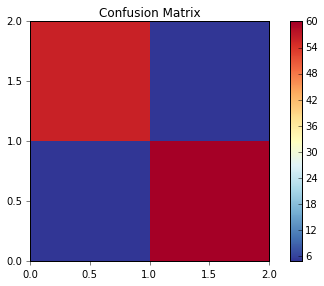

In [147]:
# take a look at the confusion matrix
plot_corr(confusion_matrix(y_test, mnb_genre_preds), title='Confusion Matrix');

In [156]:
print 'recall:', recall_score(y_test, mnb_genre_preds)
print 'precision:', precision_score(y_test, mnb_genre_preds)
print 'F1:', f1_score(y_test, mnb_genre_preds)

recall: 0.923076923077
precision: 0.923076923077
F1: 0.923076923077


In [135]:
# get an idea of some of the more important features
# some of the top ones are stop words (makes sense ...)
probs = mnb.feature_log_prob_
ind = np.argsort(probs)[1][::-1]
feature_names = np.asarray(b_vec.get_feature_names())
dexplicit(feature_names[ind][30:40])

array([u'don', u'just', u'out', u'ain', u'from', u'no', u'do', u'n****',
       u'if', u's**t'], 
      dtype='<U65')

### How about a simple LogisticRegression?

In [148]:
lr1 = LogisticRegression(penalty='l1')
lr2 = LogisticRegression(penalty='l2')

In [145]:
print 'Lasso Regularized:', cross_val_score(lr1, lyrics, genre, cv=10).mean()
print 'Ridge Regularized:', cross_val_score(lr2, lyrics, genre, cv=10).mean()

Lasso Regularized: 0.912691476591
Ridge Regularized: 0.944341736695


**Ridge Regularized Logistic Regression gets just about the same accuracy as Multinomial Naive Bayes!**

In [149]:
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
lr_genre_preds = lr2.predict(X_test)

In [154]:
confusion_matrix(y_test, lr_genre_preds)

array([[60,  1],
       [ 7, 58]])

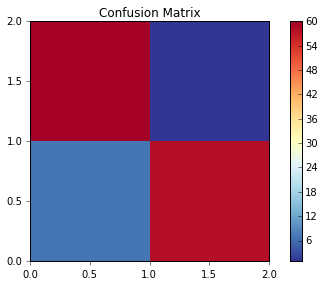

In [153]:
# take a look at the confusion matrix
plot_corr(confusion_matrix(y_test, lr_genre_preds), title='Confusion Matrix');

In [155]:
print 'recall:', recall_score(y_test, lr_genre_preds)
print 'precision:', precision_score(y_test, lr_genre_preds)
print 'F1:', f1_score(y_test, lr_genre_preds)

recall: 0.892307692308
precision: 0.983050847458
F1: 0.935483870968


**Interesting finding here: MNB gets more balanced Precision & Recall vs. LR gets higher Precision, but lower Recall!**

# Let's go through tuning the LR model

In [164]:
from sklearn.grid_search import GridSearchCV

In [163]:
lr_grid = {'penalty': ['l1', 'l2'],
           'C': np.linspace(0.0001, 1.0, 11),
           'fit_intercept': [True, False]}

In [172]:
best_lr = GridSearchCV(LogisticRegression(), lr_grid, cv=5, n_jobs=-1).fit(lyrics, genre).best_estimator_
best_lr

LogisticRegression(C=0.80001999999999995, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [173]:
print cross_val_score(best_lr, lyrics, genre, cv=10, n_jobs=-1).mean()

0.944341736695


### Looks like our original LR model was pretty close to the best tuning

# Quickly give SVMs a look --- we'd ideally need to tune the heck out of it

In [159]:
svc = SVC()

In [161]:
print cross_val_score(svc, lyrics, genre, cv=10, n_jobs=-1).mean()

0.873033213285


**Simple is still better**

### Let's try using some Trees to give us some idea of feature importance! EDA!

In [80]:
# just a helper function to get the most important features from a model

import numpy as np

def print_importants(model, top=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    important_words = np.asarray(b_vec.get_feature_names())[indices]
    return important_words[:top]

In [205]:
# snag some Tree models
erf = ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)
rf = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)
gbr = GradientBoostingClassifier(n_estimators=250, random_state=0)

In [66]:
# fit the ExtraTreesClassifier
erf.fit(lyrics, genre)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
# wrote my own function to clean up explict words ... we're gonna need it
from dexplicit import dexplicit

In [83]:
# take a look at some of the most important words in determining if a song is rap or not
print dexplicit(print_importants(erf, top=30))

[u'n****' u's**t' u'f**k' u'thi' u'em' u'with' u'like' u'b***h' u'up'
 u'ain' u'these' u'they' u'wanna' u'got' u'money' u'yo' u'is' u'we' u'from'
 u'rap' u'get' u'off' u'than' u'caus' u'gotta' u'for' u'that' u'@$$'
 u'them' u'pop']


In [206]:
# fit the vanilla RandomForestClassifier
rf.fit(lyrics, genre)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
print dexplicit(print_importants(rf, top=30))

[u'got' u'real' u'b***h' u's**t' u'yo' u'off' u'them' u'hit' u'gon'
 u'money' u'keep' u'top' u'with' u'two' u'gettin' u'what' u'tryna' u'they'
 u'too' u'all' u'hustl' u'gotta' u'of' u'flow' u'front' u'crib' u'plu'
 u'if' u'someth' u'rhyme']


### Besides explitives, some really intuitive words

- real, money, tryna, flow, hustle, rhyme, flow, crib ...

## How do the Trees perform?

In [91]:
# this takes a LONG time to run
for model in [erf, rf, gbr]:
    print cross_val_score(model, lyrics, genre, cv=10, n_jobs=-1).mean()

0.926694677871
0.928534613846
0.918573829532


Just showing that "bigger" isn't always better

### If we were to decide to go with Trees as our model, we'd want to tune them, using a gridsearch

### One more idea -- try plotting number of features (from Forest feature importance) vs. accuracy

In [203]:
feature_names = b_vec.get_feature_names()
counts_df = pd.DataFrame(lyrics, columns=feature_names)
counts_df.head()

000  01  02  03  04  05  06  07  10  100  ...   zombi  zone  zonin  zoo  \
0    0   0   0   0   0   0   0   0   0    1  ...       0     0      0    0   
1    1   0   0   0   0   0   0   0   1    1  ...       0     0      0    0   
2    0   0   0   0   0   0   0   0   0    0  ...       0     0      0    0   
3    0   0   0   0   0   0   0   0   0    0  ...       0     0      0    0   
4    0   0   0   0   0   0   0   0   0    0  ...       0     0      0    0   

   zoogang  zoom  zoot  zorro  zuckerberg  zulu  
0        0     0     0      0           0     0  
1        0     0     0      0           0     0  
2        0     0     0      0           0     0  
3        0     0     0      0           0     0  
4        0     0     0      0           0     0  

[5 rows x 10641 columns]

In [228]:
def features_elbow():
    scores = []
    feat_nums = range(1, 800, 10)

    for n_feat in feat_nums:
        key_features = print_importants(rf, top=n_feat)
        new_df = counts_df[key_features]
        score = cross_val_score(MultinomialNB(), new_df, genre).mean()
        scores.append(score)
    
    plt.plot(feat_nums, scores);

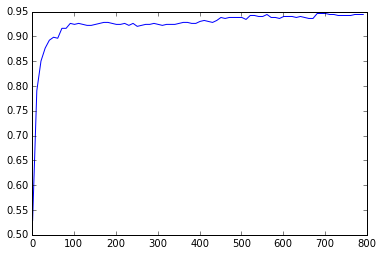

In [229]:
features_elbow()

# HOW'S THAT FOR AN ELBOW PLOT

# Future Work

- try dimensionality reducing techniques (since we have 10k+ features)<br><br>
- try tuning (ex. pruning) Trees to see if they pass LR or MNB in performance <br><br>

- get more artist/song data (isn't this always the case ...) <br><br>
- expand to other genres (multi-class case will require some more intense analyses) <br><br>
- predict scores (ex. metacritic, pitchfork, etc.) based on lyrical content <br><br>
